In [1]:
from ifapp.analize_data import gdal, np, plt, gdal_array
from ifapp.analize_data import func_Mlearn, func_raster
from ifapp.save_load_pkl import pkl_model_load, pkl_model_save

gdal.AllRegister()
gdal.UseExceptions()

In [2]:
dir_raster = r"C:\Users\Felix\ix_onepy\Data\Data TIFF\00_JUST_for_TEST"
dir_save = r"C:\Users\Felix\ix_onepy\Data\Data TIFF\00_JUST_for_TEST"
dir_model_ml = r"Data\Data Model"

load_ml_model = pkl_model_load(dir_model_ml + '/L6n7_SVRwNDVI_rbf.pkl')
print(load_ml_model)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Text(0.5, 1.0, 'Data Visualization')

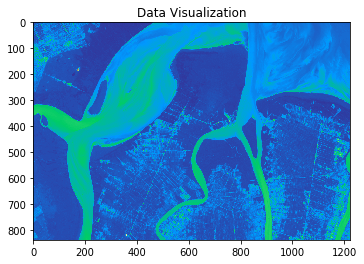

In [3]:
"""If your data is breakdown you can use the nstc """
# load_raster_stc = func_raster.stack_data(func_raster, input_path=dir_raster,
#                                          name="_no_NDVI")
load_raster_stc = gdal.Open(dir_raster + '/L67SMT_wth_NDVI.TIF')
AOI = load_raster_stc.GetRasterBand(1).ReadAsArray()
AOI = AOI > 0
img2num = func_raster.ras2num(load_raster_stc)
plt.imshow(img2num[:, :, 2], cmap=plt.get_cmap('terrain'))
plt.title('Data Visualization')

In [4]:
## Prediction model with data image
new_shape = (img2num.shape[0] * img2num.shape[1], img2num.shape[2])
img_as_array = img2num[:, :, :6].reshape(new_shape)
# img_as_array[np.isnan(img_as_array)] = 0
img_as_array = np.nan_to_num(img_as_array)
print('Reshaped from {o} to {n}'.format(o=img2num.shape, n=img_as_array.shape))

Reshaped from (839, 1222, 5) to (1025258, 5)


In [5]:
model2data_pred = load_ml_model.predict(img_as_array)
model2data = model2data_pred.reshape(img2num[:, :, 0].shape)
model2data[model2data < 0.00] = 0.00
model2data[model2data > 1.00] = 1.00
final_pred = model2data * AOI ## SVR
print("Before: ", model2data.max(), "...", "After: ", final_pred.max())

Before:  1.0 ... After:  1.0


In [6]:
func_raster.saved_data_TIF(dir_save, final_pred, name='_wthNDVI_',
                           ras=(dir_raster + '/L67SMT_wth_NDVI.TIF'))